In [7]:
import cv2
import numpy as np
import pytesseract as pyt
from matplotlib import pyplot as plt
import imutils

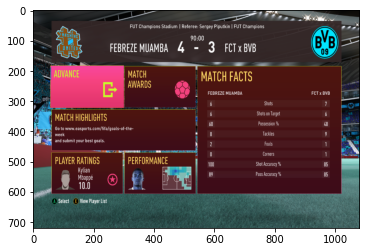

In [8]:
image_path = "data/10-11-2020_16-35-35-qyrqt4lh.png"
image_path_2 = "data/10-11-2020_16-35-36-0wd3xedc.png"
image_path_3 = "data/10-11-2020_16-35-36-0ag1a4hv.png"
image_path_4 = "data/10-11-2020_16-35-37-f4vtnd1s.png"
image_path_5 = "data/10-11-2020_16-35-37-pkztc23y.png"
image_path_6 = "data/10-11-2020_16-35-38-05isnaeg.png"
image = cv2.imread(image_path_6)
image = cv2.resize(image, (1080, 720))
plt.imshow(image)

In [9]:
pyt.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
#print(pyt.image_to_string(image))

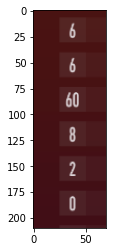

In [10]:
#img_box = image[170:500, 485:900] # Match facts
#img_box = image[190:590, 550:1000] # Match facts
img_box = image[290:500, 550:620]
plt.imshow(img_box)

6
6
60
8
2
0



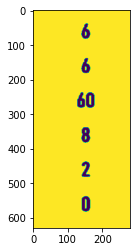

In [11]:
custom_config = r'--oem 0 --psm 6 outputbase digits'
h, w, c = img_box.shape
img_resized = cv2.resize(img_box, (w*4,h*3))
#print(pyt.image_to_string(img_box, config=custom_config))
img_gray = get_grayscale(img_resized)
# img_denoised = remove_noise(img_gray) Not working
# img_tresholded = thresholding(img_gray) gets worse
#canny = canny(img_box)
#print(pyt.image_to_string(img_gray, config=custom_config))
h, w = img_gray.shape

modified_img = apply_brightness_contrast(img_gray, 100, -200)
img_tresholded = thresholding(modified_img)
#plt.imshow(img_tresholded)

final = dilate(img_tresholded)
final = erode(final)
plt.imshow(final)
print(pyt.image_to_string(final, config=custom_config))

boxes = pyt.image_to_boxes(modified_img, config = custom_config) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(modified_img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

#plt.imshow(modified_img)

In [3]:
def apply_brightness_contrast(input_img, brightness = 0, contrast = 0):
    
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow
        
        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()
    
    if contrast != 0:
        f = 131*(contrast + 127)/(127*(131-contrast))
        alpha_c = f
        gamma_c = 127*(1-f)
        
        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

    return buf

In [19]:
# Tesseract pre-processing

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((2,2),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((2,2),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

6
6
60
8
2
0



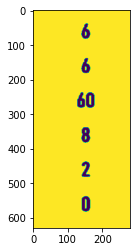

In [4]:
import cv2
import numpy as np
import pytesseract as pyt
from matplotlib import pyplot as plt

image_path = "data/10-11-2020_16-35-38-05isnaeg.png"
image = cv2.imread(image_path)
image = cv2.resize(image, (1080, 720))

img_box = image[290:500, 550:620]

custom_config = r'--oem 0 --psm 6 outputbase digits'
h, w, c = img_box.shape
img_resized = cv2.resize(img_box, (w*4,h*3))
#print(pyt.image_to_string(img_box, config=custom_config))
img_gray = get_grayscale(img_resized)
# img_denoised = remove_noise(img_gray) Not working
# img_tresholded = thresholding(img_gray) gets worse
#canny = canny(img_box)
#print(pyt.image_to_string(img_gray, config=custom_config))
h, w = img_gray.shape

modified_img = apply_brightness_contrast(img_gray, 100, -200)
img_tresholded = thresholding(modified_img)
#plt.imshow(img_tresholded)

final = dilate(img_tresholded)
final = erode(final)
plt.imshow(final)
print(pyt.image_to_string(final, config=custom_config))

boxes = pyt.image_to_boxes(modified_img, config = custom_config) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(modified_img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

#plt.imshow(modified_img)

In [33]:
import pandas as pd
import os
df = pd.DataFrame({"h_team": pd.Series(dtype='string'),\
                   "a_team": pd.Series(dtype='string'),\
                   "time": pd.Series(dtype='string'),\
                   "h_score": pd.Series(dtype='int'),\
                   "a_score": pd.Series(dtype='int'),\
                   "cancelled": pd.Series(dtype='bool'),\
                   "h_shots": pd.Series(dtype='int'),\
                   "h_shots_on_target": pd.Series(dtype='int'),\
                   "h_possession": pd.Series(dtype='int'),\
                   "h_tackles": pd.Series(dtype='int'),\
                   "h_fouls": pd.Series(dtype='int'),\
                   "h_corners": pd.Series(dtype='int'),\
                   "h_shot_acc": pd.Series(dtype='int'),\
                   "h_pass_acc": pd.Series(dtype='int'),\
                   "a_shots": pd.Series(dtype='int'),\
                   "a_shots_on_target": pd.Series(dtype='int'),\
                   "a_possession": pd.Series(dtype='int'),\
                   "a_tackles": pd.Series(dtype='int'),\
                   "a_fouls": pd.Series(dtype='int'),\
                   "a_corners": pd.Series(dtype='int'),\
                   "a_shot_acc": pd.Series(dtype='int'),\
                   "a_pass_acc": pd.Series(dtype='int'),\
                   "filename": pd.Series(dtype='string')
                  })

expected_resolution = (1080, 1920, 3)
file_list = [f for f in os.listdir("data") if f.endswith(".jpg") or f.endswith(".png") or f.endswith(".jpeg")]
total_image = len(file_list)

for idx, filename in enumerate(file_list):
    image = cv2.imread("data/" + filename)
    if image.shape != expected_resolution:
        image = cv2.resize(image, dsize=(1920, 1080), interpolation=cv2.INTER_NEAREST)

    match = None
    try:
        match = extract_match_statistics(image)
    except Exception as err: 
        print("Problem with file " + filename)
        print(err)

    df = pd.concat([df, match.get_data_frame(filename)])

    if (idx%50) == 0:
        print(str(idx) + "/" + str(total_image))

df.to_csv("data.csv", index=False)

TypeError: len() of unsized object

In [32]:
def read_text(image):
    img_gray = get_grayscale(image)
    
    modified_img = apply_brightness_contrast(img_gray, 100, -200)
    img_tresholded = thresholding(modified_img)
    
    dilated = dilate(img_tresholded)
    final = erode(dilated)
    return pyt.image_to_string(final, config=custom_config)
    #return model.predict(image)
    #return reader.readtext(image, detail = 0)

def read_string_from_box(image, top_left=None, bottom_right=None):
    if not top_left:
        top_left = (0, 0)
    if not bottom_right:
        bottom_right = (image.shape[0], image.shape[1])
    img_box = image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
    result = read_text(img_box)#reader.readtext(img_box, detail = 0)

    if len(result) > 0 :
        return result[0]
    else:
        return None

def create_team_from_results(results, home=True, team_name = "", score = 0):
    index_operator = -1
    if not home:
        index_operator = 1
        
    return Team(
        name = team_name, 
        score = score, 
        shots = results[np.where(results == 'Shots')[0][0]+index_operator], 
        shots_on_target = results[np.where(results == 'Shots on Target')[0][0]+index_operator], 
        possession = results[np.where(results == 'Possession %')[0][0]+index_operator], 
        tackles = results[np.where(results == 'Tackles')[0][0]+index_operator], 
        fouls = results[np.where(results == 'Fouls')[0][0]+index_operator], 
        corners = results[np.where(results == 'Corners')[0][0]+index_operator], 
        shot_acc = results[np.where(results == 'Shot Accuracy %')[0][0]+index_operator], 
        pass_acc = results[np.where(results == 'Pass Accuracy %')[0][0]+index_operator]
    )

def create_team_stats(image, home_team_name="", away_team_name="", home_score=0, away_score=0):
    img_box = image[280:900, 970:1800]
    img_box = cv2.blur(img_box, (3, 3))
    results = read_text(img_box)
    results = np.array(results)
    #assert(results[0].upper() == "MATCH FACTS")
    assert(len(results) == 18)
    home_team = create_team_from_results(results, home=True, team_name=home_team_name, score=home_score)
    away_team = create_team_from_results(results, home=False, team_name=away_team_name, score=away_score)

    return home_team, away_team


def extract_match_statistics(image):
    time = read_string_from_box(image, (800, 115), (1120, 155))
    home_name = read_string_from_box(image, (300, 155), (800, 220))
    away_name = read_string_from_box(image, (1120, 155), (1620, 220))
    home_score = read_string_from_box(image, (810, 150), (900, 230))
    away_score = read_string_from_box(image, (1020, 150), (1110, 230))

    home_team, away_team = create_team_stats(image, home_team_name=home_name, away_team_name=away_name, \
                      home_score=home_score, away_score=away_score)
    cancelled = (not home_score) and (not away_score)
    match = Match(home=home_team, away=away_team, time=time, cancelled=cancelled)
    return match

In [28]:
class Team():
    def __init__(self, name, score, shots, shots_on_target, possession, tackles, fouls, corners, shot_acc, pass_acc):
        self.name = name
        self.score = score
        self.shots = shots
        self.shots_on_target = shots_on_target
        self.possession = possession
        self.tackles = tackles
        self.fouls = fouls
        self.corners = corners
        self.shot_acc = shot_acc
        self.pass_acc = pass_acc
        
    def __str__(self):
        return "Team:\t " + self.name + \
                    "\nScore:\t " + str(self.score) + \
                    "\nShots:\t " + str(self.shots) + \
                    "\nShots on target:\t " + str(self.shots_on_target) + \
                    "\nPossession:\t " + str(self.possession) + \
                    "\nTackles:\t " + str(self.tackles) + \
                    "\nFouls:\t " + str(self.fouls) + \
                    "\nCorners:\t " + str(self.corners) + \
                    "\nShot accuracy:\t " + str(self.shot_acc) + \
                    "\nPass accuracy:\t " + str(self.pass_acc)


class Match():
    def __init__(self, home, away, time, cancelled=False):
        self.home = home
        self.away = away
        self.time = time
        self.cancelled = cancelled
        
    def __str__(self):
        if self.cancelled:    
            return self.home.name + " - " + self.away.name + " \t" \
                + " (Cancelled after " + str(self.time) + ")"
        else:
            return self.home.name + " - " + self.away.name + " \t" \
                + str(self.home.score) + ":" + str(self.away.score) + " (" + str(self.time) + ")"
        
    def get_data_frame(self, filename=None):
        return pd.DataFrame.from_dict({
                   "h_team": [self.home.name],\
                   "a_team": [self.away.name],\
                   "time": [self.time],\
                   "h_score": [self.home.score],\
                   "a_score": [self.away.name],\
                   "cancelled": [self.cancelled],\
                   "h_shots": [self.home.shots],\
                   "h_shots_on_target": [self.home.shots_on_target],\
                   "h_possession": [self.home.possession],\
                   "h_tackles": [self.home.tackles],\
                   "h_fouls": [self.home.fouls],\
                   "h_corners": [self.home.corners],\
                   "h_shot_acc": [self.home.shot_acc],\
                   "h_pass_acc": [self.home.pass_acc],\
                   "a_shots": [self.away.shots],\
                   "a_shots_on_target": [self.away.shots_on_target],\
                   "a_possession": [self.away.possession],\
                   "a_tackles": [self.away.tackles],\
                   "a_fouls": [self.away.fouls],\
                   "a_corners": [self.away.corners],\
                   "a_shot_acc": [self.away.shot_acc],\
                   "a_pass_acc": [self.away.pass_acc],\
                   "filename": [filename]
                  }
        )